<a href="https://colab.research.google.com/github/PierDiella/BigData_Rep/blob/main/Project_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
import math, copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import csv
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras import regularizers
from keras.optimizers import Adam
import keras.backend as K

# Dataset Exploration

Attribute Information:

Student ID

1- Student Age (1: 18-21, 2: 22-25, 3: above 26)

2- Sex (1: female, 2: male)

3- Graduated high-school type: (1: private, 2: state, 3: other)

4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)

5- Additional work: (1: Yes, 2: No)

6- Regular artistic or sports activity: (1: Yes, 2: No)

7- Do you have a partner: (1: Yes, 2: No)

8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)

9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)

10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)

11- Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)

12- Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)

13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)

14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)

15- Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)

16- Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)

17- Weekly study hours: (1: None, 2: 1-5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)

18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)

19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)

20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)

21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)

22- Attendance to classes (1: always, 2: sometimes, 3: never)

23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)

24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)

25- Taking notes in classes: (1: never, 2: sometimes, 3: always)

26- Listening in classes: (1: never, 2: sometimes, 3: always)

27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)

28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)

29- Cumulative grade point average in the last semester (/4.00): (1: 0.00-2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)

30- Expected Cumulative grade point average in the graduation (/4.00): (1: 0.00-2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)

31- Course ID

32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

In [2]:
df = pd.read_csv("student_prediction.csv")

#first few lines
print(df.head(10))

#missing values
print(df.isnull().sum())

#distribution of numerical variable
print(df.describe())

   STUDENTID  AGE  GENDER  HS_TYPE  SCHOLARSHIP  WORK  ACTIVITY  PARTNER  \
0   STUDENT1    2       2        3            3     1         2        2   
1   STUDENT2    2       2        3            3     1         2        2   
2   STUDENT3    2       2        2            3     2         2        2   
3   STUDENT4    1       1        1            3     1         2        1   
4   STUDENT5    2       2        1            3     2         2        1   
5   STUDENT6    2       2        2            3     2         2        2   
6   STUDENT7    1       2        2            4     2         2        2   
7   STUDENT8    1       1        2            3     1         1        1   
8   STUDENT9    2       1        3            3     2         1        1   
9  STUDENT10    2       1        2            3     2         2        1   

   SALARY  TRANSPORT  ...  PREP_STUDY  PREP_EXAM  NOTES  LISTENS  \
0       1          1  ...           1          1      3        2   
1       1          1  ...  

In [3]:
df.describe().T.style.background_gradient(cmap = "Oranges")

,count,mean,std,min,25%,50%,75%,max
AGE,145.000000,1.620690,0.613154,1.000000,1.000000,2.000000,2.000000,3.000000
GENDER,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
HS_TYPE,145.000000,1.944828,0.537216,1.000000,2.000000,2.000000,2.000000,3.000000
SCHOLARSHIP,145.000000,3.572414,0.805750,1.000000,3.000000,3.000000,4.000000,5.000000
WORK,145.000000,1.662069,0.474644,1.000000,1.000000,2.000000,2.000000,2.000000
ACTIVITY,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
PARTNER,145.000000,1.579310,0.495381,1.000000,1.000000,2.000000,2.000000,2.000000
SALARY,145.000000,1.627586,1.020245,1.000000,1.000000,1.000000,2.000000,5.000000
TRANSPORT,145.000000,1.620690,1.061112,1.000000,1.000000,1.000000,2.000000,4.000000
LIVING,145.000000,1.731034,0.783999,1.000000,1.000000,2.000000,2.000000,4.000000


1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: GRADE, dtype: int64


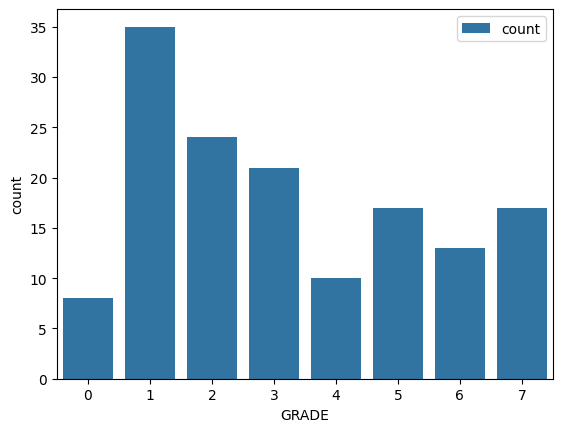

In [4]:
#distribution of "GRADE"
print(df['GRADE'].value_counts())

sns.countplot(data=df, x=df["GRADE"], label="count")
plt.show()

<Axes: ylabel='Density'>

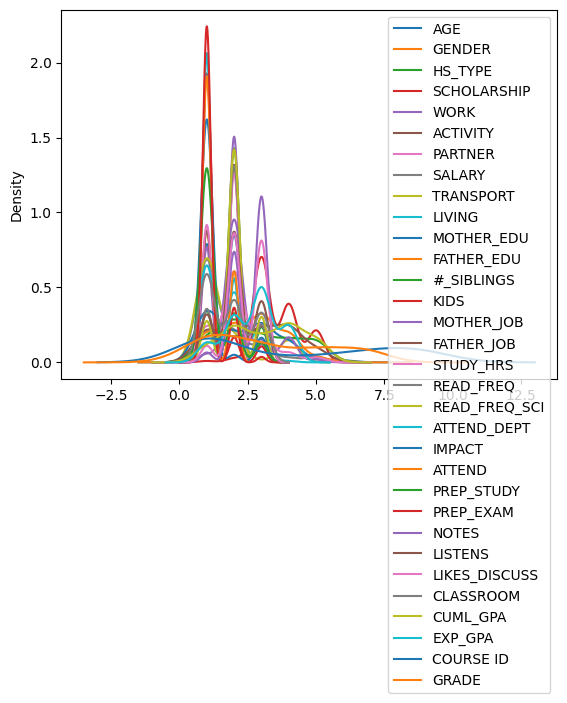

In [5]:
#density
df.plot(kind='kde')

In [6]:
# Calcola la correlazione tra "GRADE" e tutte le altre variabili
grade_correlation = df.corr(numeric_only=True)['GRADE'].sort_values(ascending=False)

# Visualizza la correlazione
print(grade_correlation)


GRADE            1.000000
GENDER           0.335533
CUML_GPA         0.315493
EXP_GPA          0.248588
READ_FREQ        0.195617
WORK             0.167445
LIKES_DISCUSS    0.146547
COURSE ID        0.142166
CLASSROOM        0.110617
HS_TYPE          0.104821
LISTENS          0.085137
#_SIBLINGS       0.084470
PREP_EXAM        0.073783
KIDS             0.066379
MOTHER_EDU       0.066318
FATHER_EDU       0.063504
NOTES            0.044862
SCHOLARSHIP      0.023963
LIVING           0.023683
PREP_STUDY       0.014638
READ_FREQ_SCI    0.003189
MOTHER_JOB      -0.030747
STUDY_HRS       -0.033065
FATHER_JOB      -0.044268
PARTNER         -0.051778
ACTIVITY        -0.062993
AGE             -0.095251
ATTEND          -0.139564
TRANSPORT       -0.156289
SALARY          -0.166352
ATTEND_DEPT     -0.184763
IMPACT          -0.203273
Name: GRADE, dtype: float64


Questo output fornisce un'indicazione di quanto ciascuna variabile sia correlata al voto degli studenti.

Una correlazione positiva indica che all'aumentare del valore della variabile, tendenzialmente aumenta anche il voto degli studenti.
Una correlazione negativa indica che all'aumentare del valore della variabile, tendenzialmente diminuisce il voto degli studenti.
Ad esempio, notiamo che le variabili come "GENDER", "CUML_GPA" (media dei voti accumulata), "EXP_GPA" (aspettativa di media dei voti alla laurea), "READ_FREQ" (frequenza di lettura di libri non scientifici), ecc., hanno una correlazione positiva significativa con il voto degli studenti, mentre altre come "TRANSPORT" (tipo di trasporto per l'università), "SALARY" (salario), "ATTEND_DEPT" (frequenza alle conferenze/seminari del dipartimento), ecc., hanno una correlazione negativa.

Questa analisi può aiutare a identificare le variabili che hanno maggiore influenza sulle performance degli studenti e guidare la selezione delle feature per la costruzione del modello di machine learning.

# Preprocessing

In [7]:
#selection of independent variables
X1 = df[['AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK', 'ACTIVITY', 'PARTNER', 'SALARY', 'TRANSPORT', 'LIVING', 'MOTHER_EDU', 'FATHER_EDU', '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB', 'STUDY_HRS', 'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'IMPACT', 'ATTEND', 'PREP_STUDY', 'PREP_EXAM', 'NOTES', 'LISTENS', 'LIKES_DISCUSS', 'CLASSROOM', 'CUML_GPA', 'EXP_GPA']].to_numpy()                 #converte dataframe in array

#selection of dependent variables
Y1 = df[['GRADE']].to_numpy()


X2 = np.array(X1, dtype=float)
Y2 = np.array(Y1, dtype=float)

print(X2)
print(Y2)

print(X2.shape)
print(Y2.shape)

[[2. 2. 3. ... 2. 1. 1.]
 [2. 2. 3. ... 2. 2. 3.]
 [2. 2. 2. ... 1. 2. 2.]
 ...
 [1. 1. 1. ... 1. 4. 3.]
 [2. 1. 2. ... 1. 5. 3.]
 [1. 1. 1. ... 1. 5. 4.]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [5.]
 [2.]
 [5.]
 [0.]
 [2.]
 [0.]
 [0.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [3.]
 [1.]
 [1.]
 [3.]
 [1.]
 [2.]
 [3.]
 [1.]
 [1.]
 [3.]
 [5.]
 [5.]
 [3.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [4.]
 [1.]
 [3.]
 [5.]
 [3.]
 [1.]
 [2.]
 [1.]
 [4.]
 [1.]
 [5.]
 [3.]
 [3.]
 [5.]
 [4.]
 [3.]
 [5.]
 [2.]
 [5.]
 [3.]
 [5.]
 [3.]
 [2.]
 [5.]
 [1.]
 [5.]
 [5.]
 [7.]
 [6.]
 [6.]
 [6.]
 [7.]
 [7.]
 [4.]
 [7.]
 [4.]
 [3.]
 [4.]
 [3.]
 [7.]
 [7.]
 [7.]
 [4.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.]
 [4.]
 [6.]
 [5.]
 [7.]
 [6.]
 [7.]
 [7.]
 [6.]
 [7.]
 [7.]
 [7.]
 [3.]
 [7.]
 [7.]
 [6.]
 [6.]
 [7.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [0.]
 [2.]
 [1.]
 [3.]
 [2.]
 [3.]
 [1.]
 [0.]
 [3.]
 [1.]
 [4.]
 [3.]
 [3.]
 [1.]
 [2.]
 [0.]
 [2.]
 [0.]
 [0.]
 [5.

# Model definition : Multiple Linear Regression

In [ ]:
X_tmp=X
Y_tmp=Y


def compute_cost_linear_reg(X, Y, W, b, lamda_):

 m = X.shape[0]
 n = len(W)
 cost = 0
 for i in range(m):
  X = X_tmp[i,:]
  f_wb_xi = np.dot(W,X) + b

  cost = cost / (2*m)

  reg_cost = 0
  for j in range(n):
    reg_cost += (W[j]**2)
    reg_cost = (lamda_/(2*m)) * reg_cost

    total_cost = cost + reg_cost
 return total_cost

np.random.seed(1)


def compute_multiple_gradient(X, Y, W, b):

  m = X.shape[0]
  n = X.shape[1]

  dj_dW = np.zeros(n)
  dj_db = 0

  for i in range(m):
    X_i = X[i,:]
    f_xi = np.dot(W, X_i) + b;
    err_i = f_xi-Y[i]
    for j in range(n):
      x_ji = X[i, j]
      dj_dW[j] = dj_dW[j] + (1/m)*x_ji*err_i;
    dj_db = dj_db + (1/m)*err_i;
  return dj_dW, dj_db


def multiple_gradient_descent (X, Y, W_in, b_in, alpha, num_iters, compute_cost_linear_reg, compute_multiple_gradient):

  W = W_in
  b = b_in

  for itt in range(num_iters):

    dj_dw, dj_db = compute_multiple_gradient(X, Y, W, b)
    W = W - alpha * dj_dw
    b = b - alpha * dj_db
    cost = compute_cost_linear_reg(X, Y, W, b, lamda_)
    if itt % 100 == 0:
        print('Itteration {}:, (W,b) = ({}, {}),\n cost = {}'.format(itt, W, b,cost))
  return W, b, cost




Model run with normalization of variables

In [ ]:
#normalization: squared normalization
X = normalize(X2, norm='l2')

Y=Y2

print(X)
print(Y)



#checking model with all dataset

W_in = np.ones(30)
b_in = random.uniform(0, 3)

lamda_=1
alpha = 0.0001

num_iters = 10000

multiple_gradient_descent(X, Y, W_in, b_in, alpha, num_iters, compute_cost_linear_reg, compute_multiple_gradient)

[[0.1796053  0.1796053  0.26940795 ... 0.1796053  0.08980265 0.08980265]
 [0.18490007 0.18490007 0.2773501  ... 0.18490007 0.18490007 0.2773501 ]
 [0.1933473  0.1933473  0.1933473  ... 0.09667365 0.1933473  0.1933473 ]
 ...
 [0.07881104 0.07881104 0.07881104 ... 0.07881104 0.31524416 0.23643312]
 [0.14948702 0.07474351 0.14948702 ... 0.07474351 0.37371755 0.22423053]
 [0.07254763 0.07254763 0.07254763 ... 0.07254763 0.36273813 0.2901905 ]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [5.]
 [2.]
 [5.]
 [0.]
 [2.]
 [0.]
 [0.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [3.]
 [1.]
 [1.]
 [3.]
 [1.]
 [2.]
 [3.]
 [1.]
 [1.]
 [3.]
 [5.]
 [5.]
 [3.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [4.]
 [1.]
 [3.]
 [5.]
 [3.]
 [1.]
 [2.]
 [1.]
 [4.]
 [1.]
 [5.]
 [3.]
 [3.]
 [5.]
 [4.]
 [3.]
 [5.]
 [2.]
 [5.]
 [3.]
 [5.]
 [3.]
 [2.]
 [5.]
 [1.]
 [5.]
 [5.]
 [7.]
 [6.]
 [6.]
 [6.]
 [7.]
 [7.]
 [4.]
 [7.]
 [4.]
 [3.]
 [4.]
 [3.]
 [7.]
 [7.]
 [7.]
 [4.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.

(array([0.80115049, 0.84460077, 0.78518583, 0.59847909, 0.82212754,
        0.80762778, 0.81297334, 0.78462988, 0.78450259, 0.80570798,
        0.7555398 , 0.71119238, 0.70136119, 0.87230703, 0.7268253 ,
        0.67237018, 0.74611924, 0.79857553, 0.77086489, 0.84688856,
        0.84060611, 0.84427545, 0.8496366 , 0.8718483 , 0.71306962,
        0.77431285, 0.74398354, 0.80898726, 0.72398586, 0.73333689]),
 array([-0.03800353]),
 0.0018606835772152631)

Model run with regularization of variables

In [ ]:
#regularization: MinMax Scaler
scaler = MinMaxScaler(feature_range=(0, 5))

X = scaler.fit_transform(X2)

scaler = MinMaxScaler(feature_range=(0, 5))

Y1 = scaler.fit_transform(Y2)
Y = np.ravel(Y1)

print(X)
print(Y)


#checking model with all dataset

W_in = np.ones(30)
b_in = random.uniform(0, 3)

lamda_=1
alpha = 0.0001

num_iters = 10000

multiple_gradient_descent(X, Y, W_in, b_in, alpha, num_iters, compute_cost_linear_reg, compute_multiple_gradient)

[[2.5        5.         5.         ... 2.5        0.         0.        ]
 [2.5        5.         5.         ... 2.5        1.25       3.33333333]
 [2.5        5.         2.5        ... 0.         1.25       1.66666667]
 ...
 [0.         0.         0.         ... 0.         3.75       3.33333333]
 [2.5        0.         2.5        ... 0.         5.         3.33333333]
 [0.         0.         0.         ... 0.         5.         5.        ]]
[0.71428571 0.71428571 0.71428571 0.71428571 0.71428571 1.42857143
 3.57142857 1.42857143 3.57142857 0.         1.42857143 0.
 0.         0.71428571 1.42857143 1.42857143 0.71428571 1.42857143
 1.42857143 2.14285714 0.71428571 0.71428571 2.14285714 0.71428571
 1.42857143 2.14285714 0.71428571 0.71428571 2.14285714 3.57142857
 3.57142857 2.14285714 0.71428571 1.42857143 1.42857143 0.71428571
 1.42857143 0.71428571 1.42857143 0.71428571 0.71428571 0.71428571
 0.71428571 2.85714286 0.71428571 2.14285714 3.57142857 2.14285714
 0.71428571 1.42857143 0.714

(array([-0.20780803,  0.17522121,  0.09261287, -0.18052515,  0.13281969,
        -0.09965523, -0.00800022, -0.0968522 , -0.14100104,  0.12243244,
         0.07149436, -0.01348411,  0.0680139 ,  0.12008928, -0.04265359,
        -0.09851983, -0.01404006,  0.1237581 , -0.11142767, -0.00415118,
        -0.02130064, -0.04290945, -0.02862778,  0.25968864, -0.14765608,
         0.11291021, -0.04876019,  0.01555219,  0.20574193, -0.00403362]),
 2.341770850908429,
 5.594404066215317e-07)

The results with the MinMax scaler solution are much better. This will be the chosen method

Model run to write parameters and results in a csv file to discuss about it.

In [ ]:
X_tmp = X
Y_tmp = Y

W_in = np.ones(30)
b_in = random.uniform(1, 3)

lamba_=0.3  #change at every run
alpha = 0.0001

num_iters = 10000
W,b,cost= multiple_gradient_descent(X, Y, W_in, b_in, alpha, num_iters, compute_cost_linear_reg, compute_multiple_gradient)

print("W:",W)

print("b:",b)

print("cost:", cost)

with open('rec.csv', mode='a', newline='') as csv_file:
    fieldnames = ['W_in', 'b_in', 'alpha', 'lamda_', 'num_iters', 'cost', 'b', 'W']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    if csv_file.tell() == 0:
        writer.writeheader()

    writer.writerow({'W_in': W_in.tolist(), 'b_in': b_in, 'alpha': alpha, 'lamda_': lamba_, 'num_iters': num_iters, 'cost': cost, 'b': b, 'W': W.tolist()})

Result and discussion

In [ ]:
df_results=pd.read_csv("rec.csv")

df_results.describe().T.style.background_gradient(cmap = "Oranges")

,count,mean,std,min,25%,50%,75%,max
b_in,106.000000,1.981072,0.544279,1.046566,1.458995,1.973380,2.454227,2.999351
alpha,106.000000,0.000100,0.000000,0.000100,0.000100,0.000100,0.000100,0.000100
lamda_,106.000000,0.599057,0.264933,0.000000,0.400000,0.600000,0.800000,1.000000
num_iters,106.000000,10000.000000,0.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
cost,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
b,106.000000,1.521942,0.531212,0.609873,1.012399,1.514434,1.983737,2.515774


In [ ]:
df_results

,W_in,b_in,alpha,lamda_,num_iters,cost,b,W
0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2.191157,0.0001,1.0,10000,1.303236e-08,1.726983,"[-0.1964769277155467, 0.17907723282153012, 0.1..."
1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2.049885,0.0001,1.0,10000,1.361872e-08,1.589103,"[-0.19393565992448633, 0.17994203663424033, 0...."
2,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2.268015,0.0001,1.0,10000,1.272115e-08,1.801996,"[-0.1978594875820066, 0.17860674204994725, 0.1..."
3,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2.543510,0.0001,1.0,10000,1.165074e-08,2.070877,"[-0.20281520886380794, 0.17692028984907932, 0...."
4,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.820193,0.0001,1.0,10000,1.461165e-08,1.364926,"[-0.1898038704397417, 0.18134810147805214, 0.1..."
...,...,...,...,...,...,...,...,...
101,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.836171,0.0001,0.1,10000,1.454099e-08,1.380520,"[-0.19009128567815192, 0.18125029289806535, 0...."
102,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.678159,0.0001,0.1,10000,1.525019e-08,1.226301,"[-0.18724889561527464, 0.18221756985023546, 0...."
103,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2.337854,0.0001,0.1,10000,1.244313e-08,1.870159,"[-0.19911578096245827, 0.17817922027946767, 0...."
104,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2.719376,0.0001,0.1,10000,1.100432e-08,2.242521,"[-0.20597875937341897, 0.1758437206846501, 0.0..."


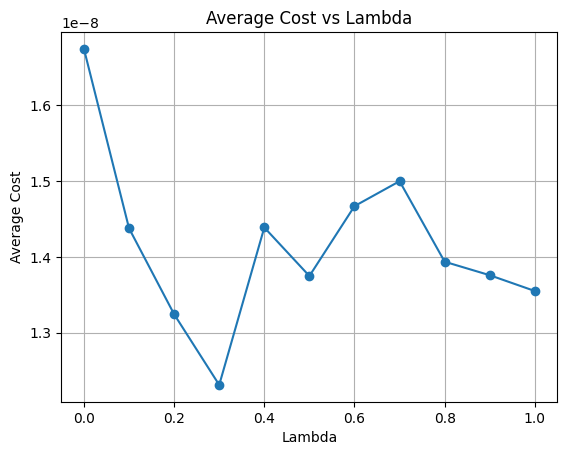

In [ ]:
average_costs = df_results.groupby("lamda_")["cost"].mean().reset_index()

plt.plot(average_costs["lamda_"], average_costs["cost"], marker='o', linestyle='-')

plt.title('Average Cost vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('Average Cost')
plt.grid(True)
plt.show()

Lambda with a value of 0.3 gives the best results

# Training and Test Model

In [ ]:
#30% of the dataset is reserved for the test set
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print("Original array:\n", X)
print("Array by columns:\n X_train:", X_train, "\n X_test:", X_test, "\n Y_train:",Y_train, "\n Y_test:",Y_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

Original array:
 [[2.5        5.         5.         ... 2.5        0.         0.        ]
 [2.5        5.         5.         ... 2.5        1.25       3.33333333]
 [2.5        5.         2.5        ... 0.         1.25       1.66666667]
 ...
 [0.         0.         0.         ... 0.         3.75       3.33333333]
 [2.5        0.         2.5        ... 0.         5.         3.33333333]
 [0.         0.         0.         ... 0.         5.         5.        ]]
Array by columns:
 X_train: [[2.5        5.         2.5        ... 2.5        1.25       1.66666667]
 [2.5        5.         2.5        ... 2.5        3.75       3.33333333]
 [0.         5.         0.         ... 0.         3.75       5.        ]
 ...
 [2.5        0.         2.5        ... 2.5        0.         0.        ]
 [0.         0.         2.5        ... 0.         5.         3.33333333]
 [2.5        5.         2.5        ... 5.         2.5        3.33333333]] 
 X_test: [[0.         5.         5.         ... 0.         3.75   

In [ ]:
X_tmp = X_train
Y_tmp = Y_train

W_in = np.ones(30)
b_in = random.uniform(1, 3)

lamba_=0.3
alpha = 0.0001

num_iters = 10000
W,b,cost= multiple_gradient_descent(X_train, Y_train, W_in, b_in, alpha, num_iters, compute_cost_linear_reg, compute_multiple_gradient)

print("W:",W)
print("b:",b)
print("cost:", cost)


Y_pred = np.dot(X_test, W) + b

print("Y predicted:", Y_pred)


#mean squared error to evaluete model
def mean_squared_error(Y_test, Y_pred):
    mse = np.mean(np.abs(np.array(Y_pred) - np.array(Y_test))**2, axis=0)
    return mse

mse = mean_squared_error(Y_test, Y_pred)


print("Mean squared error:", mse)

Itteration 0:, (W,b) = ([0.98958179 0.97940392 0.9855219  0.98106631 0.97964316 0.98100915
 0.98340663 0.99521337 0.99331631 0.99306685 0.99254393 0.99059935
 0.98618729 0.99695645 0.99023316 0.98643634 0.99094826 0.98602151
 0.98447101 0.99384986 0.9966389  0.99245492 0.99521995 0.99725599
 0.97722127 0.98385272 0.97927833 0.98692926 0.98419615 0.98217492], 1.2402657361472924),
 cost = 0.0047994396832236165
Itteration 100:, (W,b) = ([ 0.45847101 -0.0302993   0.25585066  0.0282495  -0.022023    0.03669924
  0.15033969  0.7438426   0.64477485  0.63474213  0.60935969  0.51436015
  0.29786795  0.8277423   0.48962856  0.3027833   0.53003701  0.28262064
  0.1969983   0.65947597  0.81221826  0.59316996  0.74160204  0.85015233
 -0.16284281  0.16926352 -0.05445141  0.33621383  0.20235353  0.09123664], 0.9415890653816488),
 cost = 4.222575543752806e-05
Itteration 200:, (W,b) = ([ 0.33389551 -0.20775674  0.09761383 -0.17587303 -0.20294984 -0.14931075
 -0.02499941  0.67375805  0.5512759   0.54373

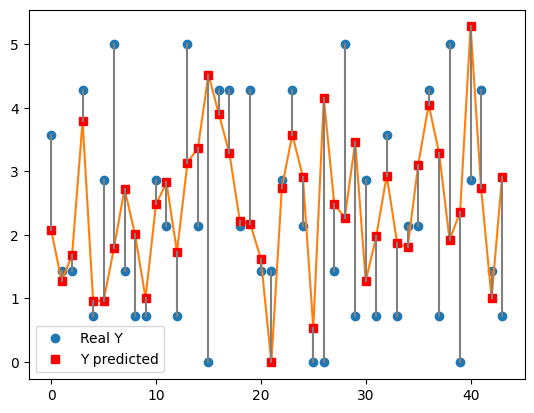

In [ ]:
#plotting Y real and Y predicted
plt.plot(Y_test, "o", label="Real Y")
plt.plot(np.dot(X_test, W) + b)
plt.plot(Y_pred, "s", color="red", label="Y predicted")

for i in range(len(Y_test)):
    plt.plot([i, i], [Y_test[i], Y_pred[i]], "-", color="gray")

plt.legend()
plt.show()

# Neural network

In [12]:
# Definizione della funzione RMSE
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))

# Definizione del modello
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=X2.shape[1]))
model.add(Dense(1, activation='linear', kernel_regularizer='l2', bias_regularizer='l2'))  # Aggiunta della regolarizzazione L2

# Compilazione del modello con RMSE come funzione di perdita, Adam come ottimizzatore e lambda=0.01
model.compile(loss=rmse, optimizer=Adam(learning_rate=0.01))

# Addestramento del modello
model.fit(X2, Y2, epochs=50, batch_size=10)

# Previsioni
predictions = model.predict(X2)

# Stampiamo le prime 5 previsioni e valori attesi
for i in range(5):
   print('Predicted Grade: %.2f => Expected Grade: %.2f' % (predictions[i][0], Y2[i][0]))






Epoch 1/50
15/15 [==============================] - 1s 3ms/step - loss: 2.2312
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 2.1373
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 2.0271
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 1.9719
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 1.9504
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 1.9932
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 1.9000
Epoch 8/50
15/15 [==============================] - 0s 4ms/step - loss: 1.8369
Epoch 9/50
15/15 [==============================] - 0s 3ms/step - loss: 1.9682
Epoch 10/50
15/15 [==============================] - 0s 4ms/step - loss: 1.8390
Epoch 11/50
15/15 [==============================] - 0s 3ms/step - loss: 1.8741
Epoch 12/50
15/15 [==============================] - 0s 3ms/step - loss: 2.0677
Epoch 13/50
15/15 [==============================